# Plotting the Inconsistency Events per Task for the Different Matching Logic Approaches
## NAME: Rishit Chaudhary
## SRN: PES1201800316

In [1]:
from pathlib import Path
import seaborn as sns
import os
import pandas as pd
import numpy as np

In [2]:
class LogRecord:
    TRACE_NAME_IND = 0
    GM_COUNT_IND = 1
    LM_COUNT_IND = 2
    PARTITION_SIZE_IND = 3
    INTERNAL_INCONSISTENCY_COUNT_IND = 16
    EXTERNAL_INCONSISTENCY_COUNT_IND = 17
    INTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND = 12
    EXTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND = 13
    SUCCESS_PERCENT_IND = 30
    AVG_WORKERS_SEARCHED_PER_TASK_COUNT_IND = 31

    LAST_TERM_IND = -1
    
    def __init__(self, file_data):
        self.file_data = file_data.split('\n')
        print(self.file_data)

    def __extract_int(self, line_index, term_index):
        print(self.file_data[line_index])
        return int(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_float(self, line_index, term_index):
        print(self.file_data[line_index])
        return float(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_str(self, line_index, term_index):
        print(self.file_data[line_index])
        return str(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_success_percent(self, line_index, term_index):
        return float(self.file_data[line_index].strip().split()[term_index].split('=')[-1].rstrip('%'))
    
    def get_gm_count(self):
        return self.__extract_int(LogRecord.GM_COUNT_IND, self.LAST_TERM_IND)

    def get_lm_count(self):
        return self.__extract_int(LogRecord.LM_COUNT_IND, self.LAST_TERM_IND)

    def get_partition_size(self):
        return self.__extract_int(LogRecord.PARTITION_SIZE_IND, self.LAST_TERM_IND)
 
    def get_cluster_size(self):
        return self.get_gm_count() * self.get_lm_count() * self.get_partition_size()

    def get_internal_matching_logic_operation_count(self):
        return self.__extract_int(LogRecord.INTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND, self.LAST_TERM_IND)
    
    def get_external_matching_logic_operation_count(self):
        return self.__extract_int(LogRecord.EXTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND, self.LAST_TERM_IND)

    def get_avg_workers_searched_per_task_count(self):
        return self.__extract_float(LogRecord.AVG_WORKERS_SEARCHED_PER_TASK_COUNT_IND, self.LAST_TERM_IND)

    def get_trace_file_name(self):
        return self.__extract_str(LogRecord.TRACE_NAME_IND, self.LAST_TERM_IND)

    def get_success_percent(self):
        return self.__extract_success_percent(LogRecord.SUCCESS_PERCENT_IND, LogRecord.LAST_TERM_IND)
    
    def get_internal_inconsistency_count(self):
        return self.__extract_int(LogRecord.INTERNAL_INCONSISTENCY_COUNT_IND, LogRecord.LAST_TERM_IND)
    
    def get_external_inconsistency_count(self):
        return self.__extract_int(LogRecord.EXTERNAL_INCONSISTENCY_COUNT_IND, LogRecord.LAST_TERM_IND)

In [3]:
MATCHING_LOGIC_TECHNIQUES = ['Original',
                             'Separation',
                             'Ordering_L_M',
                             'Ordering_M_L',
                             'Ordering_L_L',
                             'Ordering_M_M']

# Cluster Size
TEN_THOUSAND_NODE_CLUSTER_SIZE = 10000
THOUSAND_NODE_CLUSTER_SIZE = 1000

CLUSTER_TRACE_NAMES = {'synthetic_YH_trace', 'synthetic_FB_sub_2000jobs'}

# BASE_FILE_PATH = Path("./inconsistency_count")
# BASE_FILE_PATH = Path("./inconsistency_worker_count")
BASE_FILE_PATH = Path("./inconsistency_worker_count_synthetic_separate_random")
# BASE_FILE_PATH = Path("./inconsistency_count_with_same_random_seed")

INTERNAL_INCONSISTENCY_FILE_EXTENSION = "_ini.txt"
EXTERNAL_INCONSISTENCY_FILE_EXTENSION = "_exi.txt"
WORKERS_SEARCHED_FILE_EXTENSION = "_workers_searched.txt"
LOG_FILE_EXTENSION = ".log"

BASE_FILE_PATH

PosixPath('inconsistency_worker_count_synthetic_separate_random')

In [4]:
MATCHING_LOGIC_DATA = dict()

MAIN_STATISTICS = 0
INTERNAL_INCONSISTENCY_COUNT = 1
EXTERNAL_INCONSISTENCY_COUNT = 2
COMBINED_INCONSISTENCY_COUNT = 3

WORKERS_SEARCHED_COUNT = 4
READ_WORKERS_SEARCHED_COUNT = 5


for logic in MATCHING_LOGIC_TECHNIQUES:
    MATCHING_LOGIC_DATA[logic] = dict()
    for trace in CLUSTER_TRACE_NAMES:
        MATCHING_LOGIC_DATA[logic][trace] = dict()
        for cluster_size in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE]:
            MATCHING_LOGIC_DATA[logic][trace][cluster_size] = dict()
            MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT] = dict()
            MATCHING_LOGIC_DATA[logic][trace][cluster_size][READ_WORKERS_SEARCHED_COUNT] = dict()
        

In [5]:
isLogFile = lambda x : x.endswith(LOG_FILE_EXTENSION)
isInternalInconsistencyFile = lambda x : x.endswith(INTERNAL_INCONSISTENCY_FILE_EXTENSION)
isExternalInconsistencyFile = lambda x : x.endswith(EXTERNAL_INCONSISTENCY_FILE_EXTENSION)
isWorkersSearchedFile = lambda x: x.endswith(WORKERS_SEARCHED_FILE_EXTENSION)

In [6]:
for logic in MATCHING_LOGIC_TECHNIQUES:
    FILES_IN_MATCHING_LOGIC_FOLDER = os.listdir(BASE_FILE_PATH / Path(logic))
    LOG_FILE_LIST = filter(isLogFile, FILES_IN_MATCHING_LOGIC_FOLDER)
    for log_file in LOG_FILE_LIST:
        LOG_FILE_NAME_WITHOUT_EXTENSION = log_file.split('.')[0]
        INTERNAL_INCONSISTENCY_FILE = [x
                                       for x in FILES_IN_MATCHING_LOGIC_FOLDER
                                           if isInternalInconsistencyFile(x) and
                                              x.startswith(LOG_FILE_NAME_WITHOUT_EXTENSION)]
        EXTERNAL_INCONSISTENCY_FILE = [x
                                       for x in FILES_IN_MATCHING_LOGIC_FOLDER
                                           if isExternalInconsistencyFile(x) and
                                              x.startswith(LOG_FILE_NAME_WITHOUT_EXTENSION)]
        
        WORKERS_SEARCHED_FILE = [
            x
            for x in FILES_IN_MATCHING_LOGIC_FOLDER
                if isWorkersSearchedFile(x) and
                   x.startswith(LOG_FILE_NAME_WITHOUT_EXTENSION)
        ]
        
        # ---
        
        if bool(INTERNAL_INCONSISTENCY_FILE) is False or \
           bool(EXTERNAL_INCONSISTENCY_FILE) is False or \
           os.path.getsize(BASE_FILE_PATH / Path(logic) / Path(log_file)) == 0:
            continue

        # Get the trace name from log_file
        with open(BASE_FILE_PATH / Path(logic) / Path(log_file)) as fHandler:
            file_data = fHandler.read()
            cluster_trace_name = LogRecord(file_data).get_trace_file_name()
            cluster_size = LogRecord(file_data).get_cluster_size()
            
        if cluster_trace_name not in CLUSTER_TRACE_NAMES:
            continue

        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][MAIN_STATISTICS] = log_file
        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][INTERNAL_INCONSISTENCY_COUNT] = \
            INTERNAL_INCONSISTENCY_FILE[0]
        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][EXTERNAL_INCONSISTENCY_COUNT] = \
            EXTERNAL_INCONSISTENCY_FILE[0]
        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][WORKERS_SEARCHED_COUNT] = \
            WORKERS_SEARCHED_FILE[0]


MATCHING_LOGIC_DATA

['Analysing logs for trace file: synthetic_YH_trace', 'Number of GMs: 10', 'Number of LMs: 10', 'Number of Partition Size: 100', 'Simulator Info , Received CMD line arguments.', 'Simulator Info , Simulation running', 'Simulation ended in 49865.39685344696 s ', 'Simulator Info , Number of Jobs completed: 10000', '', '', '--------------------------------------------------------------------------------', '', '\x1binternal_matching_logic_op\x1b : 1554163', '\x1bexternal_matching_logic_op\x1b : 44840', '\x1btask_end_event\x1b : 247925', '\x1blaunch_on_node_event\x1b : 247925', '\x1binternal_inconsistency_event\x1b : 0', '\x1bexternal_inconsistency_event\x1b : 10', '\x1bmatch_found_event\x1b : 247935', '\x1bperiodic_lm_update_event\x1b : 2508', '\x1baperiodic_lm_update_event\x1b : 247935', '\x1bjob_arrival_event\x1b : 10000', '\x1bcluster_saturated_event\x1b : 0', '', '', '--------------------------------------------------------------------------------', '', 'Derived attributes:', '\x1bTotal

{'Original': {'synthetic_YH_trace': {10000: {3: {},
    5: {},
    0: 'record-2021-10-22-22-50-59.log',
    1: 'record-2021-10-22-22-50-59_ini.txt',
    2: 'record-2021-10-22-22-50-59_exi.txt',
    4: 'record-2021-10-22-22-50-59_workers_searched.txt'},
   1000: {3: {},
    5: {},
    0: 'record-2021-10-22-22-50-56.log',
    1: 'record-2021-10-22-22-50-56_ini.txt',
    2: 'record-2021-10-22-22-50-56_exi.txt',
    4: 'record-2021-10-22-22-50-56_workers_searched.txt'}},
  'synthetic_FB_sub_2000jobs': {10000: {3: {},
    5: {},
    0: 'record-2021-10-22-22-50-58.log',
    1: 'record-2021-10-22-22-50-58_ini.txt',
    2: 'record-2021-10-22-22-50-58_exi.txt',
    4: 'record-2021-10-22-22-50-58_workers_searched.txt'},
   1000: {3: {},
    5: {},
    0: 'record-2021-10-22-22-50-55.log',
    1: 'record-2021-10-22-22-50-55_ini.txt',
    2: 'record-2021-10-22-22-50-55_exi.txt',
    4: 'record-2021-10-22-22-50-55_workers_searched.txt'}}},
 'Separation': {'synthetic_YH_trace': {10000: {3: {},
    5:

In [7]:
getPathToFile = lambda matching_logic, file_name : BASE_FILE_PATH / Path(matching_logic) / Path(file_name)
getPathToFile("Separation", "record-2021-10-13-17-42-17_ini.txt")

PosixPath('inconsistency_worker_count_synthetic_separate_random/Separation/record-2021-10-13-17-42-17_ini.txt')

In [8]:
for logic in MATCHING_LOGIC_TECHNIQUES:
    for trace in CLUSTER_TRACE_NAMES:
        for cluster_size in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE]:
            print(logic, trace, cluster_size)
            INTERNAL_INCONSISTENCY_FILE = MATCHING_LOGIC_DATA[logic][trace][cluster_size][INTERNAL_INCONSISTENCY_COUNT]
            EXTERNAL_INCONSISTENCY_FILE = MATCHING_LOGIC_DATA[logic][trace][cluster_size][EXTERNAL_INCONSISTENCY_COUNT]
            WORKERS_SEARCHED_FILE = MATCHING_LOGIC_DATA[logic][trace][cluster_size][WORKERS_SEARCHED_COUNT]
            
            with open(getPathToFile(logic, INTERNAL_INCONSISTENCY_FILE)) as fHandler_int, \
                 open(getPathToFile(logic, EXTERNAL_INCONSISTENCY_FILE)) as fHandler_ext, \
                 open(getPathToFile(logic, WORKERS_SEARCHED_FILE)) as fHandler_workers:
                    # Adding internal inconsistency counts
                    for line in fHandler_int:
                        job_id_task_id, inconsistency_count = [x.strip() for x in line.split(':')]
                        inconsistency_count = int(inconsistency_count)
                        MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT][job_id_task_id] = \
                            inconsistency_count + \
                                MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT].get(job_id_task_id, 0)

                    # Adding external inconsistency counts
                    for line in fHandler_ext:
                        job_id_task_id, inconsistency_count = [x.strip() for x in line.split(':')]
                        inconsistency_count = int(inconsistency_count)
                        MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT][job_id_task_id] = \
                            inconsistency_count + \
                                MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT].get(job_id_task_id, 0)

                    # Adding workers searched counts
                    for line in fHandler_workers:
                        job_id_task_id, search_count = [x.strip() for x in line.split(':')]
                        search_count = int(search_count)
                        MATCHING_LOGIC_DATA[logic][trace][cluster_size][READ_WORKERS_SEARCHED_COUNT][job_id_task_id] = \
                            search_count + \
                                MATCHING_LOGIC_DATA[logic][trace][cluster_size][READ_WORKERS_SEARCHED_COUNT].get(job_id_task_id, 0)


MATCHING_LOGIC_DATA

Original synthetic_YH_trace 10000
Original synthetic_YH_trace 1000
Original synthetic_FB_sub_2000jobs 10000
Original synthetic_FB_sub_2000jobs 1000
Separation synthetic_YH_trace 10000
Separation synthetic_YH_trace 1000
Separation synthetic_FB_sub_2000jobs 10000
Separation synthetic_FB_sub_2000jobs 1000
Ordering_L_M synthetic_YH_trace 10000
Ordering_L_M synthetic_YH_trace 1000
Ordering_L_M synthetic_FB_sub_2000jobs 10000
Ordering_L_M synthetic_FB_sub_2000jobs 1000
Ordering_M_L synthetic_YH_trace 10000
Ordering_M_L synthetic_YH_trace 1000
Ordering_M_L synthetic_FB_sub_2000jobs 10000
Ordering_M_L synthetic_FB_sub_2000jobs 1000
Ordering_L_L synthetic_YH_trace 10000
Ordering_L_L synthetic_YH_trace 1000
Ordering_L_L synthetic_FB_sub_2000jobs 10000
Ordering_L_L synthetic_FB_sub_2000jobs 1000
Ordering_M_M synthetic_YH_trace 10000
Ordering_M_M synthetic_YH_trace 1000
Ordering_M_M synthetic_FB_sub_2000jobs 10000
Ordering_M_M synthetic_FB_sub_2000jobs 1000


{'Original': {'synthetic_YH_trace': {10000: {3: {'1424_1': 1,
     '1424_10': 1,
     '1424_2': 1,
     '1424_9': 1,
     '1424_3': 1,
     '1424_7': 1,
     '1424_8': 1,
     '1424_6': 1,
     '1424_5': 1,
     '1424_4': 1},
    5: {'1_1': 1,
     '2_1': 1,
     '2_2': 1,
     '2_3': 1,
     '2_4': 1,
     '2_5': 1,
     '2_6': 1,
     '2_7': 1,
     '2_8': 1,
     '3_1': 1,
     '3_2': 1,
     '3_3': 1,
     '3_4': 1,
     '3_5': 1,
     '3_6': 1,
     '3_7': 1,
     '3_8': 1,
     '3_9': 1,
     '3_10': 1,
     '3_11': 2,
     '3_12': 2,
     '3_13': 2,
     '3_14': 2,
     '3_15': 2,
     '3_16': 2,
     '3_17': 2,
     '3_18': 2,
     '3_19': 2,
     '3_20': 2,
     '4_1': 3,
     '4_2': 3,
     '4_3': 3,
     '4_4': 3,
     '4_5': 3,
     '4_6': 3,
     '4_7': 3,
     '4_8': 3,
     '4_9': 3,
     '4_10': 3,
     '5_1': 1,
     '5_2': 1,
     '5_3': 1,
     '5_4': 1,
     '6_1': 1,
     '6_2': 1,
     '6_3': 1,
     '6_4': 1,
     '6_5': 1,
     '6_6': 1,
     '6_7': 1,
     '6_8

---

## Get the Total Task Count per Trace:

In [9]:
TASK_COUNT_IND = 1
CLUSTER_TRACE_FILE_EXTENSION = ".tr"

In [10]:
def total_tasks_in_trace(PATH_TO_TRACE_FILE, cluster_trace_name):
    task_count = 0
    with open(PATH_TO_TRACE_FILE / Path(cluster_trace_name + CLUSTER_TRACE_FILE_EXTENSION)) as fHandler:
        for job in fHandler:
            task_count += int(job.split()[TASK_COUNT_IND])
    
    return task_count

In [11]:
PATH_TO_TRACE_FILE = BASE_FILE_PATH / Path("traces")

total_task_count_per_trace = dict()

for cluster_trace_name in CLUSTER_TRACE_NAMES:
    total_task_count_per_trace[cluster_trace_name] = total_tasks_in_trace(PATH_TO_TRACE_FILE, cluster_trace_name)

total_task_count_per_trace

{'synthetic_YH_trace': 247925, 'synthetic_FB_sub_2000jobs': 159921}

---

In [12]:
WORKERS_SEARCHED_X_AXIS_NAME = INCONSISTENCY_COUNT_X_AXIS_NAME = "Matching Logic Approaches"

In [13]:
INCONSISTENCY_COUNT_Y_AXIS_NAME = "Inconsistency Count per Task"

In [14]:
WORKERS_SEARCHED_Y_AXIS_NAME = "Workers Searched per Task"

In [15]:
def create_inconsistency_dataframe(MATCHING_LOGIC_DATA, CLUSTER_TRACE_NAMES, TRACE_NAME, CLUSTER_SIZE):
    assert TRACE_NAME in CLUSTER_TRACE_NAMES, f"Invalid trace name={TRACE_NAME} provided!"
    assert CLUSTER_SIZE in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE], \
            f"Invalid cluster size={CLUSTER_SIZE} provided!"
    
    input_list = list()
#     for logic in filter(lambda x : x != "Original", MATCHING_LOGIC_TECHNIQUES):  # To ignore Original approach
    for logic in MATCHING_LOGIC_TECHNIQUES:
        # Add tasks which did have inconsistency events > 0
        for datum in MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][COMBINED_INCONSISTENCY_COUNT].values():
            input_list.append([logic, datum])
        
        if len(MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][COMBINED_INCONSISTENCY_COUNT].values()) == 0:
            # Add tasks which did not have any inconsistency events with 0
            NO_INCONSISTENCY_EVENT = 0
            task_count_with_inconsistency_event = \
                len(MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][COMBINED_INCONSISTENCY_COUNT].keys())
            for _ in range(total_task_count_per_trace[TRACE_NAME] - task_count_with_inconsistency_event):
                input_list.append([logic, NO_INCONSISTENCY_EVENT])

    return pd.DataFrame(input_list, columns=[INCONSISTENCY_COUNT_X_AXIS_NAME, INCONSISTENCY_COUNT_Y_AXIS_NAME])

In [16]:
def create_workers_searched_dataframe(MATCHING_LOGIC_DATA, CLUSTER_TRACE_NAMES, TRACE_NAME, CLUSTER_SIZE):
    assert TRACE_NAME in CLUSTER_TRACE_NAMES, f"Invalid trace name={TRACE_NAME} provided!"
    assert CLUSTER_SIZE in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE], \
            f"Invalid cluster size={CLUSTER_SIZE} provided!"
    
    input_list = list()
#     for logic in filter(lambda x : x != "Original", MATCHING_LOGIC_TECHNIQUES):  # To ignore Original approach
    for logic in MATCHING_LOGIC_TECHNIQUES:
        # Add tasks which did have inconsistency events > 0
        for datum in MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][READ_WORKERS_SEARCHED_COUNT].values():
            input_list.append([logic, datum])
        
        # Add tasks which did not have any inconsistency events with 0
#         NO_INCONSISTENCY_EVENT = 0
#         task_count_with_inconsistency_event = \
#             len(MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][COMBINED_INCONSISTENCY_COUNT].keys())
#         for _ in range(total_task_count_per_trace[TRACE_NAME] - task_count_with_inconsistency_event):
#             input_list.append([logic, NO_INCONSISTENCY_EVENT])

    return pd.DataFrame(input_list, columns=[WORKERS_SEARCHED_X_AXIS_NAME, WORKERS_SEARCHED_Y_AXIS_NAME])

In [17]:
MATCHING_LOGIC_DATA["Ordering_L_M"]["synthetic_YH_trace"][10_000][COMBINED_INCONSISTENCY_COUNT]

{}

---

In [18]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15.7,10.5)})
sns.set(font_scale = 1.75)

---

In [19]:
SHOW_OUTLIERS = False

# Inconsistency Events Per Task

## Plot for `synthetic_YH_trace` in 1000 Node cluster

In [20]:
create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                               CLUSTER_TRACE_NAMES,
                               "synthetic_YH_trace",
                               1000
                               ).groupby(INCONSISTENCY_COUNT_X_AXIS_NAME).describe()

Inconsistency Count per Task                      \
                                                 count      mean       std   
Matching Logic Approaches                                                    
Ordering_L_L                                    5655.0  4.286826  5.028725   
Ordering_L_M                                    3064.0  5.403721  6.326764   
Ordering_M_L                                    4513.0  4.933525  5.403203   
Ordering_M_M                                    3590.0  4.657103  6.034241   
Original                                        5785.0  4.639931  5.414221   
Separation                                      3567.0  4.438744  6.121466   

                                                     
                           min  25%  50%  75%   max  
Matching Logic Approaches                            
Ordering_L_L               1.0  1.0  2.0  5.0  31.0  
Ordering_L_M               1.0  1.0  2.0  8.0  35.0  
Ordering_M_L               1.0  1.0  3.0  6.0  30.0  
Ordering_M_M               1.0  1.0  2.0  5.0  31.0  
Original                   1.0  1.0  2.0  6.0  29.0  
Separation                 1.0  1.0  1.0  4.0  31.0

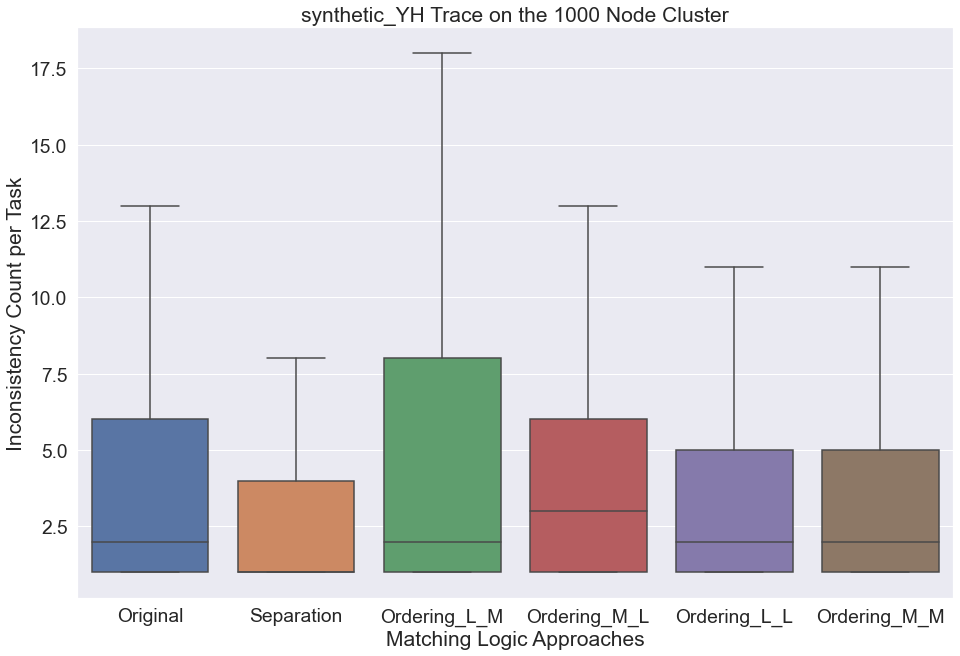

In [21]:
ax = sns.boxplot(x=INCONSISTENCY_COUNT_X_AXIS_NAME, y=INCONSISTENCY_COUNT_Y_AXIS_NAME, 
                 data=create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                                                     CLUSTER_TRACE_NAMES,
                                                     "synthetic_YH_trace",
                                                     1000
                                                     ), showfliers = SHOW_OUTLIERS)
ax.set(title='synthetic_YH Trace on the 1000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("synthetic_YH_trace_1000.jpeg"), dpi=300) 

---

## Plot for `synthetic_YH_trace` in 10,000 Node cluster

In [22]:
create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                               CLUSTER_TRACE_NAMES,
                               "synthetic_YH_trace",
                               10_000
                               ).groupby(INCONSISTENCY_COUNT_X_AXIS_NAME).describe()

Inconsistency Count per Task                     \
                                                 count      mean      std   
Matching Logic Approaches                                                   
Ordering_L_L                                       6.0  2.333333  1.21106   
Ordering_L_M                                  247925.0  0.000000  0.00000   
Ordering_M_L                                  247925.0  0.000000  0.00000   
Ordering_M_M                                  247925.0  0.000000  0.00000   
Original                                          10.0  1.000000  0.00000   
Separation                                    247925.0  0.000000  0.00000   

                                                     
                           min   25%  50%  75%  max  
Matching Logic Approaches                            
Ordering_L_L               1.0  1.25  2.5  3.0  4.0  
Ordering_L_M               0.0  0.00  0.0  0.0  0.0  
Ordering_M_L               0.0  0.00  0.0  0.0  0.0  
Ordering_M_M               0.0  0.00  0.0  0.0  0.0  
Original                   1.0  1.00  1.0  1.0  1.0  
Separation                 0.0  0.00  0.0  0.0  0.0

In [23]:
create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                               CLUSTER_TRACE_NAMES,
                               "synthetic_YH_trace",
                               10_000
                               )[INCONSISTENCY_COUNT_X_AXIS_NAME].unique()

# This result means that the other approaches did not have any inconsistency events
# array(['Original', 'Ordering_L_L'], dtype=object)

array(['Original', 'Separation', 'Ordering_L_M', 'Ordering_M_L',
       'Ordering_L_L', 'Ordering_M_M'], dtype=object)

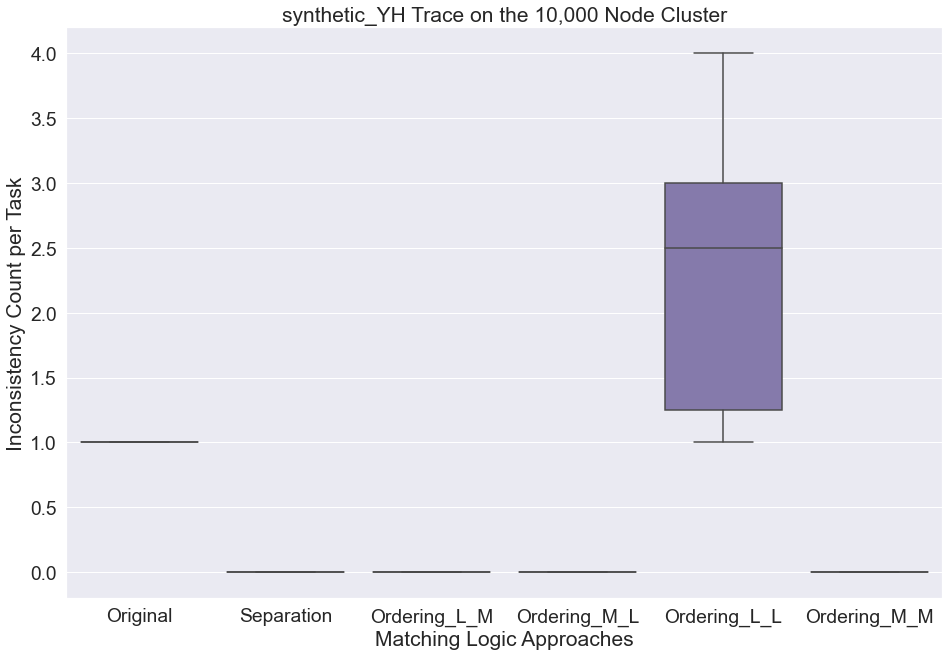

In [24]:
ax = sns.boxplot(x=INCONSISTENCY_COUNT_X_AXIS_NAME, y=INCONSISTENCY_COUNT_Y_AXIS_NAME,
                 data=create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                                                     CLUSTER_TRACE_NAMES,
                                                     "synthetic_YH_trace",
                                                     10_000
                                                     ), showfliers = SHOW_OUTLIERS)
ax.set(title='synthetic_YH Trace on the 10,000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("synthetic_YH_trace_10_000.jpeg"), dpi=300) 

---

## Plot for `synthetic_FB_sub_2000jobs` in 1000 Node cluster

In [25]:
create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                               CLUSTER_TRACE_NAMES,
                               "synthetic_FB_sub_2000jobs",
                               1000
                               ).groupby(INCONSISTENCY_COUNT_X_AXIS_NAME).describe()

Inconsistency Count per Task                      \
                                                 count      mean       std   
Matching Logic Approaches                                                    
Ordering_L_L                                   19283.0  1.401131  1.157861   
Ordering_L_M                                   23604.0  1.522581  1.317769   
Ordering_M_L                                   29480.0  2.822049  2.956120   
Ordering_M_M                                   21578.0  1.664380  1.608988   
Original                                       18084.0  1.386972  1.155881   
Separation                                     19890.0  1.529713  1.366937   

                                                     
                           min  25%  50%  75%   max  
Matching Logic Approaches                            
Ordering_L_L               1.0  1.0  1.0  1.0  24.0  
Ordering_L_M               1.0  1.0  1.0  2.0  26.0  
Ordering_M_L               1.0  1.0  2.0  3.0  33.0  
Ordering_M_M               1.0  1.0  1.0  2.0  23.0  
Original                   1.0  1.0  1.0  1.0  23.0  
Separation                 1.0  1.0  1.0  2.0  21.0

In [26]:
create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                               CLUSTER_TRACE_NAMES,
                               "synthetic_FB_sub_2000jobs",
                               1000
                               ).groupby(INCONSISTENCY_COUNT_X_AXIS_NAME).sum()

,Inconsistency Count per Task
Matching Logic Approaches,
Ordering_L_L,27018
Ordering_L_M,35939
Ordering_M_L,83194
Ordering_M_M,35914
Original,25082
Separation,30426


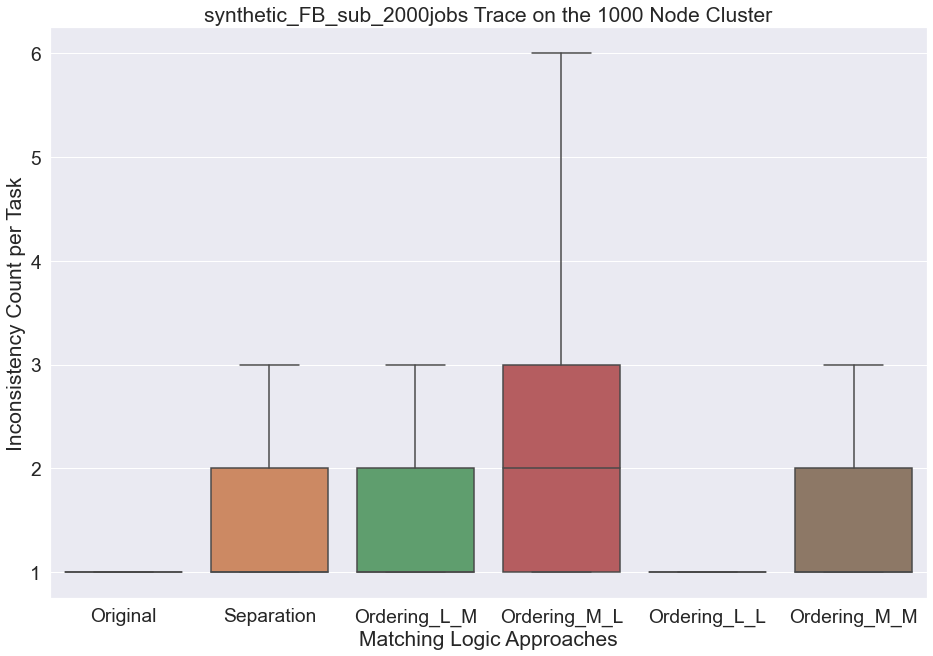

In [27]:
ax = sns.boxplot(x=INCONSISTENCY_COUNT_X_AXIS_NAME, y=INCONSISTENCY_COUNT_Y_AXIS_NAME,
                 data=create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                                                     CLUSTER_TRACE_NAMES,
                                                     "synthetic_FB_sub_2000jobs",
                                                     1000
                                                     ), showfliers = SHOW_OUTLIERS)
ax.set(title='synthetic_FB_sub_2000jobs Trace on the 1000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("synthetic_FB_sub_2000jobs_1000.jpeg"), dpi=300) 

---

## Plot for `synthetic_FB_sub_2000jobs` in 10,000 Node cluster

In [28]:
create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                               CLUSTER_TRACE_NAMES,
                               "synthetic_FB_sub_2000jobs",
                               10_000
                               ).groupby(INCONSISTENCY_COUNT_X_AXIS_NAME).describe()

Inconsistency Count per Task                      \
                                                 count      mean       std   
Matching Logic Approaches                                                    
Ordering_L_L                                     491.0  2.484725  1.835387   
Ordering_L_M                                      36.0  1.027778  0.166667   
Ordering_M_L                                      90.0  1.622222  0.828940   
Ordering_M_M                                      75.0  1.000000  0.000000   
Original                                         895.0  4.911732  3.637062   
Separation                                       133.0  1.120301  0.326543   

                                                     
                           min  25%  50%  75%   max  
Matching Logic Approaches                            
Ordering_L_L               1.0  1.0  2.0  3.0   9.0  
Ordering_L_M               1.0  1.0  1.0  1.0   2.0  
Ordering_M_L               1.0  1.0  1.0  2.0   4.0  
Ordering_M_M               1.0  1.0  1.0  1.0   1.0  
Original                   1.0  2.0  4.0  7.0  15.0  
Separation                 1.0  1.0  1.0  1.0   2.0

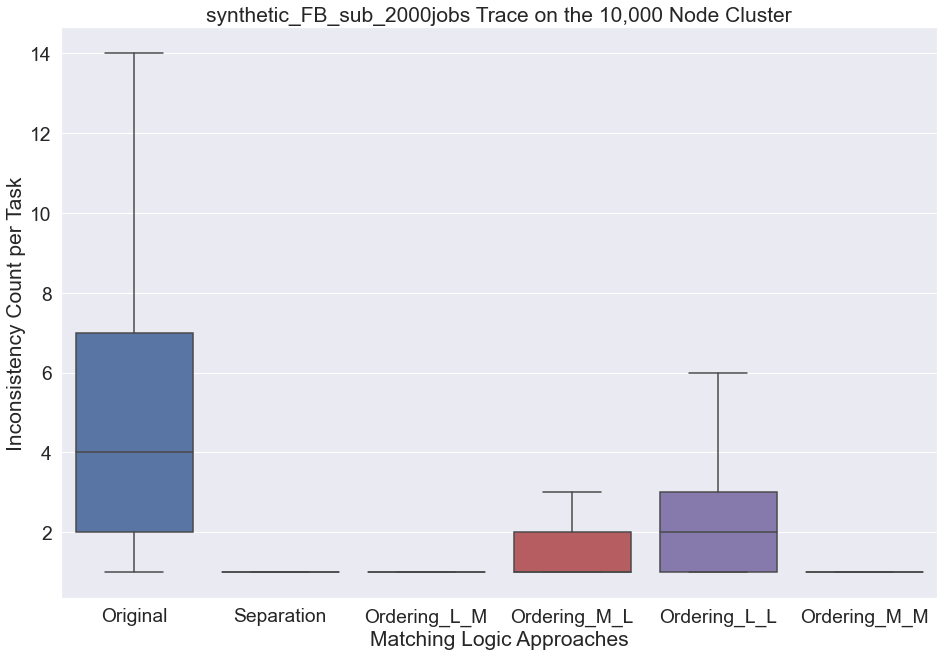

In [29]:
ax = sns.boxplot(x=INCONSISTENCY_COUNT_X_AXIS_NAME, y=INCONSISTENCY_COUNT_Y_AXIS_NAME,
                 data=create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                                                     CLUSTER_TRACE_NAMES,
                                                     "synthetic_FB_sub_2000jobs",
                                                     10_000
                                                     ), showfliers = SHOW_OUTLIERS)
ax.set(title='synthetic_FB_sub_2000jobs Trace on the 10,000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("synthetic_FB_sub_2000jobs_10_000.jpeg"), dpi=300) 

---

In [30]:
SHOW_OUTLIERS = False

In [31]:
'synthetic_YH_trace', 'synthetic_FB_sub_2000jobs'

('synthetic_YH_trace', 'synthetic_FB_sub_2000jobs')

# Workers Searched Per Task

## Plot for `synthetic_YH_trace` in 1000 Node cluster

In [32]:
create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                  CLUSTER_TRACE_NAMES,
                                  "synthetic_YH_trace",
                                  1000
                                  ).groupby(WORKERS_SEARCHED_X_AXIS_NAME).describe()

Workers Searched per Task                           \
                                              count        mean          std   
Matching Logic Approaches                                                      
Ordering_L_L                               247925.0    1.097780     0.993131   
Ordering_L_M                               247925.0    1.066782     0.922466   
Ordering_M_L                               247925.0    1.089805     0.983011   
Ordering_M_M                               247925.0    1.067436     0.914668   
Original                                   247925.0  114.889777  5592.381975   
Separation                                 247925.0    1.063862     0.904639   

                                                          
                           min  25%  50%  75%        max  
Matching Logic Approaches                                 
Ordering_L_L               1.0  1.0  1.0  1.0       32.0  
Ordering_L_M               1.0  1.0  1.0  1.0       36.0  
Ordering_M_L               1.0  1.0  1.0  1.0       31.0  
Ordering_M_M               1.0  1.0  1.0  1.0       32.0  
Original                   1.0  2.0  4.0  7.0  1003845.0  
Separation                 1.0  1.0  1.0  1.0       32.0

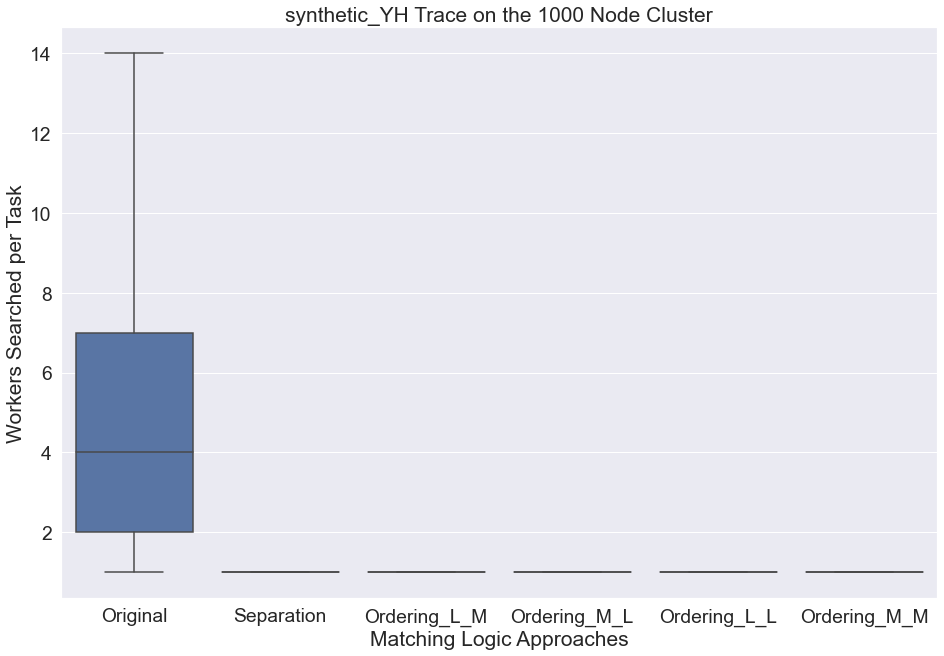

In [33]:
ax = sns.boxplot(x=WORKERS_SEARCHED_X_AXIS_NAME, y=WORKERS_SEARCHED_Y_AXIS_NAME, 
                 data=create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                                        CLUSTER_TRACE_NAMES,
                                                        "synthetic_YH_trace",
                                                        1000
                                                        ), showfliers = SHOW_OUTLIERS)
ax.set(title='synthetic_YH Trace on the 1000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("synthetic_YH_trace_1000_workers_searched.jpeg"), dpi=300) 

---

## Plot for `synthetic_YH_trace` in 10,000 Node cluster

In [34]:
create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                  CLUSTER_TRACE_NAMES,
                                  "synthetic_YH_trace",
                                  10_000
                                  ).groupby(WORKERS_SEARCHED_X_AXIS_NAME).describe()

Workers Searched per Task                            \
                                              count      mean        std  min   
Matching Logic Approaches                                                       
Ordering_L_L                               247925.0  1.000056   0.012702  1.0   
Ordering_L_M                               247925.0  1.000000   0.000000  1.0   
Ordering_M_L                               247925.0  1.000000   0.000000  1.0   
Ordering_M_M                               247925.0  1.000000   0.000000  1.0   
Original                                   247925.0  6.449543  11.491802  1.0   
Separation                                 247925.0  1.000000   0.000000  1.0   

                                                  
                           25%  50%  75%     max  
Matching Logic Approaches                         
Ordering_L_L               1.0  1.0  1.0     5.0  
Ordering_L_M               1.0  1.0  1.0     1.0  
Ordering_M_L               1.0  1.0  1.0     1.0  
Ordering_M_M               1.0  1.0  1.0     1.0  
Original                   2.0  4.0  8.0  2186.0  
Separation                 1.0  1.0  1.0     1.0

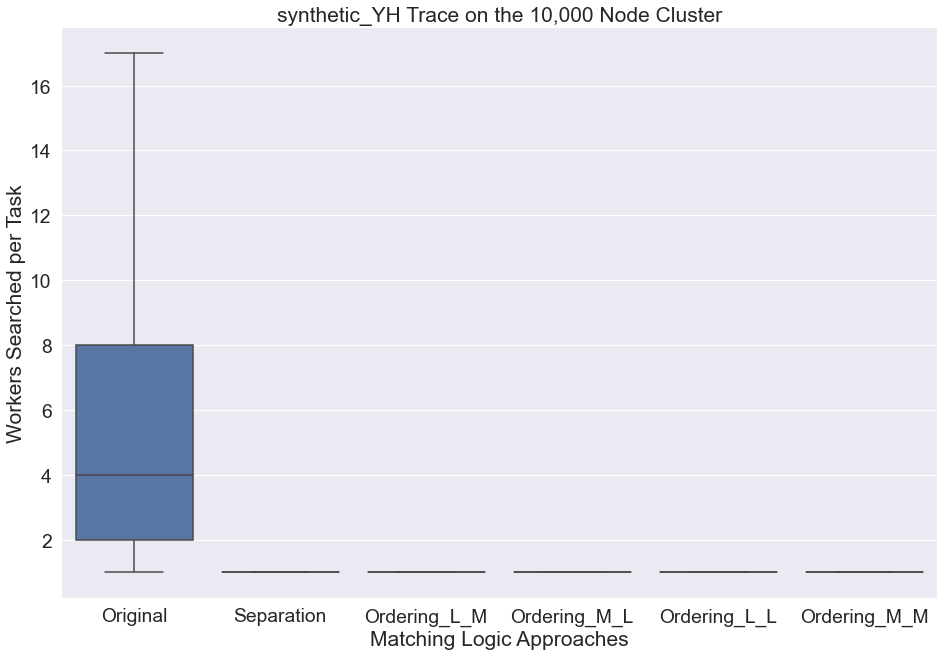

In [35]:
ax = sns.boxplot(x=WORKERS_SEARCHED_X_AXIS_NAME, y=WORKERS_SEARCHED_Y_AXIS_NAME, 
                 data=create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                                        CLUSTER_TRACE_NAMES,
                                                        "synthetic_YH_trace",
                                                        10_000
                                                        ), showfliers = SHOW_OUTLIERS)
ax.set(title='synthetic_YH Trace on the 10,000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("synthetic_YH_trace_10_000_workers_searched.jpeg"), dpi=300) 

---

## Plot for `synthetic_FB_sub_2000jobs` in 1000 Node cluster

In [36]:
create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                  CLUSTER_TRACE_NAMES,
                                  "synthetic_FB_sub_2000jobs",
                                  1000
                                  ).groupby(WORKERS_SEARCHED_X_AXIS_NAME).describe()

Workers Searched per Task                            \
                                              count         mean          std   
Matching Logic Approaches                                                       
Ordering_L_L                               159921.0     1.168946     0.608127   
Ordering_L_M                               159921.0     1.224730     0.740246   
Ordering_M_L                               159921.0     1.520219     1.675801   
Ordering_M_M                               159921.0     1.224573     0.820147   
Original                                   159921.0  1611.996511  1549.768455   
Separation                                 159921.0     1.190256     0.698016   

                                                                  
                           min     25%     50%     75%       max  
Matching Logic Approaches                                         
Ordering_L_L               1.0     1.0     1.0     1.0      25.0  
Ordering_L_M               1.0     1.0     1.0     1.0      27.0  
Ordering_M_L               1.0     1.0     1.0     1.0      34.0  
Ordering_M_M               1.0     1.0     1.0     1.0      24.0  
Original                   1.0  1089.0  1407.0  1773.0  111013.0  
Separation                 1.0     1.0     1.0     1.0      22.0

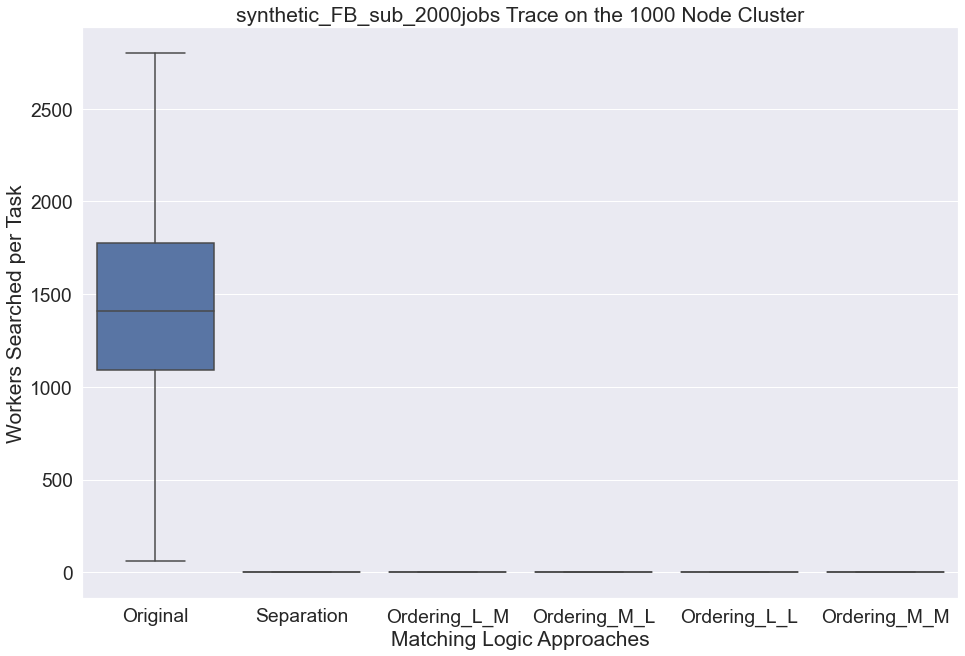

In [37]:
ax = sns.boxplot(x=WORKERS_SEARCHED_X_AXIS_NAME, y=WORKERS_SEARCHED_Y_AXIS_NAME, 
                 data=create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                                        CLUSTER_TRACE_NAMES,
                                                        "synthetic_FB_sub_2000jobs",
                                                        1000
                                                        ), showfliers = SHOW_OUTLIERS)
ax.set(title='synthetic_FB_sub_2000jobs Trace on the 1000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("synthetic_FB_sub_2000jobs_1000_workers_searched.jpeg"), dpi=300) 

---

## Plot for `synthetic_FB_sub_2000jobs` in 10,000 Node cluster

In [38]:
create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                  CLUSTER_TRACE_NAMES,
                                  "synthetic_FB_sub_2000jobs",
                                  10_000
                                  ).groupby(WORKERS_SEARCHED_X_AXIS_NAME).describe()

Workers Searched per Task                         \
                                              count       mean         std   
Matching Logic Approaches                                                    
Ordering_L_L                               159921.0   1.007629    0.170935   
Ordering_L_M                               159921.0   1.000231    0.015615   
Ordering_M_L                               159921.0   1.000913    0.043158   
Ordering_M_M                               159921.0   1.000469    0.021651   
Original                                   159921.0  52.080383  359.199208   
Separation                                 159921.0   1.000932    0.033630   

                                                           
                           min   25%   50%   75%      max  
Matching Logic Approaches                                  
Ordering_L_L               1.0   1.0   1.0   1.0     10.0  
Ordering_L_M               1.0   1.0   1.0   1.0      3.0  
Ordering_M_L               1.0   1.0   1.0   1.0      5.0  
Ordering_M_M               1.0   1.0   1.0   1.0      2.0  
Original                   1.0  14.0  30.0  50.0  16395.0  
Separation                 1.0   1.0   1.0   1.0      3.0

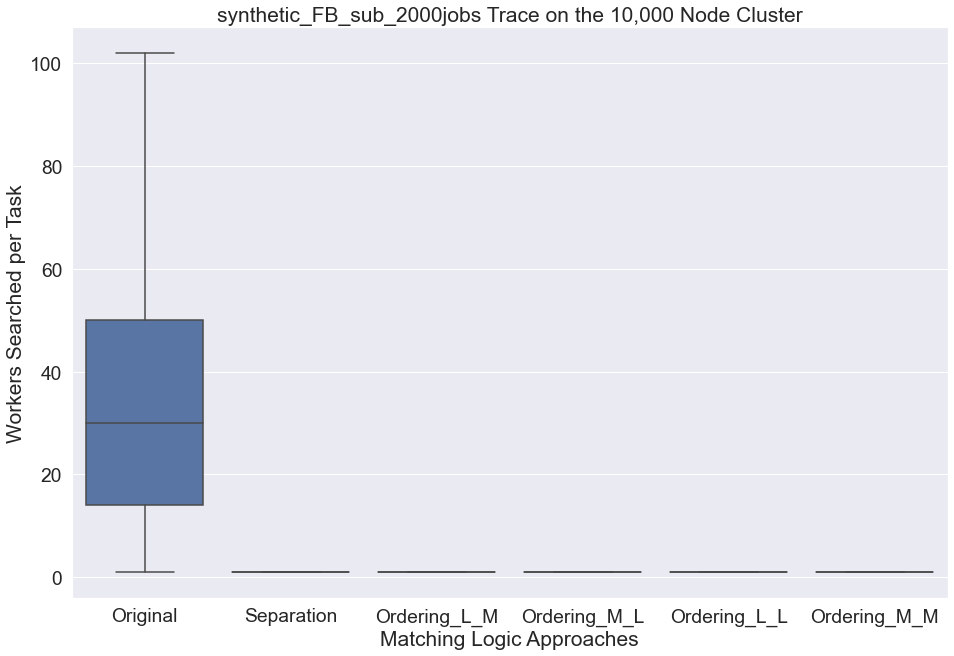

In [39]:
ax = sns.boxplot(x=WORKERS_SEARCHED_X_AXIS_NAME, y=WORKERS_SEARCHED_Y_AXIS_NAME, 
                 data=create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                                        CLUSTER_TRACE_NAMES,
                                                        "synthetic_FB_sub_2000jobs",
                                                        10_000
                                                        ), showfliers = SHOW_OUTLIERS)
ax.set(title='synthetic_FB_sub_2000jobs Trace on the 10,000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("synthetic_FB_sub_2000jobs_10_000_workers_searched.jpeg"), dpi=300) 

---